<a href="https://colab.research.google.com/github/henriquepaes1/vendas/blob/main/Previs%C3%A3o_de_Demanda_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# Previsão de Demanda com Machine Learning 

As técnicas de Machine Learning são muito relevantes para o mundo corporativo, naquilo que diz respeito à padrões de consumo. Anteriormente, fizemos previsão de *Churn rate*, agora, teremos a oportunidade de trabalhar com Séries Temporais, utilizando o Prophet do Facebook.

Nesse projeto, tentaremos prever a demanda de uma loja especializada em vinhos. Para essa tarefa, dispomos de 2 datasets: um sobre o catálogo da loja e outro sobre as vendas ao longo do tempo.

* [Dados sobre os produtos](https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv)
* [Dados de Vendas](https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv)


## Sobre Séries Temporais
Quando falamos sobre séries temporais, nos referimos à um conjunto de dados ordenados ao longo do tempo. As séries temporais são utilizadas em diversas áreas de atuação, pois oferecem um bom poder de predição, por uma série de características que serão apresentadas a seguir:
* Tendência - em séries temporais é possível observar como a frequência dos fatos estudados se comporta ao longo do tempo, se a **tendência** é de alta, baixa ou estabilidade.
* Sazonalidade - é possível observar se um fenômeno se repete respeitando um intervalo fixo de tempo. Por exemplo, um supermercado pode notar alta na venda de chocolates nas datas próximas ao feriado de Páscoa.
* Ciclos - variação de frequência repentina, sem intervalo definido. Pode indicar um fenômeno anormal, como por exemplo uma crise ou catástrofe.

### Estacionariedade
Quando falamos de séries temporais, é necessário entender que há um *background* estatístico muito sólido, o que faz com que o conjunto de dados tenha que apresentar algumas características para que as previsões sejam realizadas. Uma delas é que a série seja **estacionária**, isto é: apresente média e variância constantes ao longo do tempo. Quando a série não respeita essas condições, é possível dizer que não há um padrão bem definido e, seria caótico realizar qualquer tipo de estudo com esse conjunto de dados. Atualmente, dispomos de ferramentas estatísticas para transformas séries temporais em séries temporais estacionárias.

## Séries Temporais e vendas
No contexto desse problema, as séries temporais são de suma importância. Primeiramente, ao analisármos o histórico das vendas anteriores, é possível entender o consumo dos clientes e responder a perguntas como: 

Qual vinho possuí maior saída nos meses de verão? Durante esses meses, existe alguma promoção que posso ser lançada a fim de atingir mais clientes? 

Além disso, ao analisármos as tendências das séries temporais, é possível também realizar previsões para o futuro, que ajudam os lojistas a enxergarem melhor a demanda e se prepararem melhor para a temporada.


## Análise exploratória
Após uma breve introdução do problema que estaremos lidando nesse projeto, vamos entender a loja que estamos analisando, atráves do estudo do dataset do catálogo.

In [1]:
# importando bibliotecas e pacotes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport

In [2]:
!pip install pandas-profiling --upgrade

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv")
df.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,"1,548.00",267.82


Nesse momento, é possível ver que trata-se de um dataset relativamente simples, com colunas que descrevem brevemente os vinhos disponíveis no catálogo. Abaixo, faremos duas análises a respeito do dataset, uma quantitativa, utilizando Pandas Profilling e outra mais qualitativa, com alguns plots sobre o catálogo.

Obs: a coluna "vintage" possui entradas igual a 'NV' que significa Non-vintage, indicando que o vinho não é safrado.

In [4]:
# Criando report da análise exploratória
report = ProfileReport(df, title="Análise Exploratória")
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.dtypes

item_id       int64
name         object
producer     object
country      object
region       object
vintage      object
kind         object
price_brl    object
price_usd    object
dtype: object

In [6]:
# tratamento das entradas para tratá-las como números
df['price_brl'] = df['price_brl'].str.replace(',', '')
df['price_usd'] = df['price_usd'].str.replace(',', '')

In [7]:
# transformando as colunas de preço em float
df['price_brl'] = pd.to_numeric(df['price_brl'])
df['price_usd'] = pd.to_numeric(df['price_usd'])

In [8]:
df.dtypes

item_id        int64
name          object
producer      object
country       object
region        object
vintage       object
kind          object
price_brl    float64
price_usd    float64
dtype: object

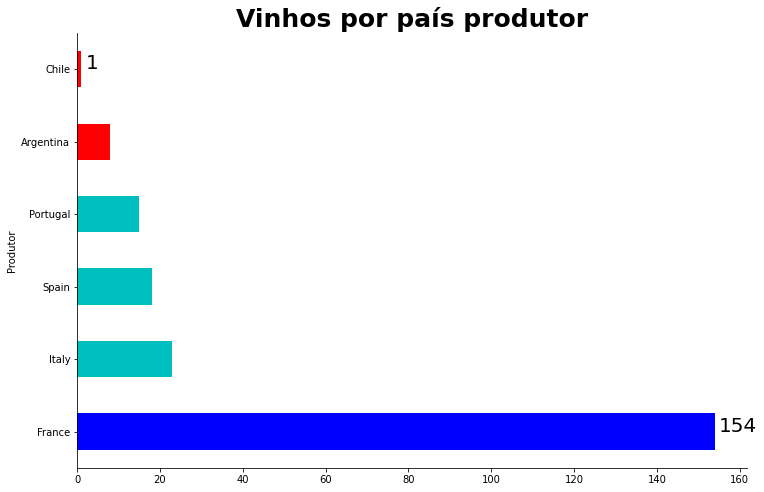

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['b', 'c', 'c', 'c', 'r', 'r']
ax = df.country.value_counts().plot(kind='barh', color=colors)
ax.set_ylabel('Produtor')
ax.set_title('Vinhos por país produtor', fontdict={'fontsize':25, 'weight':'bold'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate(df.country.value_counts()[0], (155, 0), xycoords='data', fontsize=20)
ax.annotate(df.country.value_counts()[5], (2, 5), xycoords='data', fontsize=20)
plt.show()

In [10]:
print("Os vinhos são produzidos por {} produtores diferentes.".format(df.producer.nunique()))

Os vinhos são produzidos por 58 produtores diferentes.


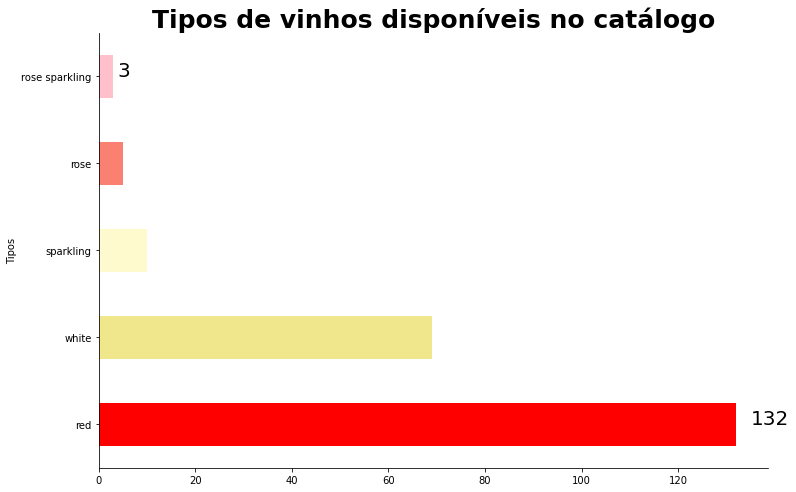

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['r', 'khaki', 'lemonchiffon', 'salmon', 'pink']
ax = df.kind.value_counts().plot(kind='barh', color=colors)
ax.set_ylabel('Tipos')
ax.set_title('Tipos de vinhos disponíveis no catálogo', fontdict={'fontsize':25, 'weight':'bold'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate(df.kind.value_counts()[0], (135, 0), xycoords='data', fontsize=20)
ax.annotate(df.kind.value_counts()[4], (4, 4), xycoords='data', fontsize=20)
plt.show()

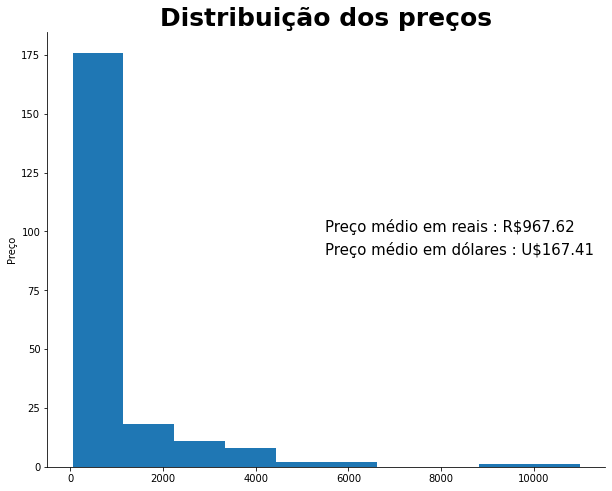

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax = df['price_brl'].plot(kind='hist')
ax.set_ylabel('Preço')
ax.set_title('Distribuição dos preços', fontdict={'fontsize':25, 'weight':'bold'})
ax.annotate('Preço médio em reais : R${:.2f}'.format(df.price_brl.mean()), (5500, 100), xycoords='data', fontsize=15)
ax.annotate('Preço médio em dólares : U${:.2f}'.format(df.price_usd.mean()), (5500, 90), xycoords='data', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

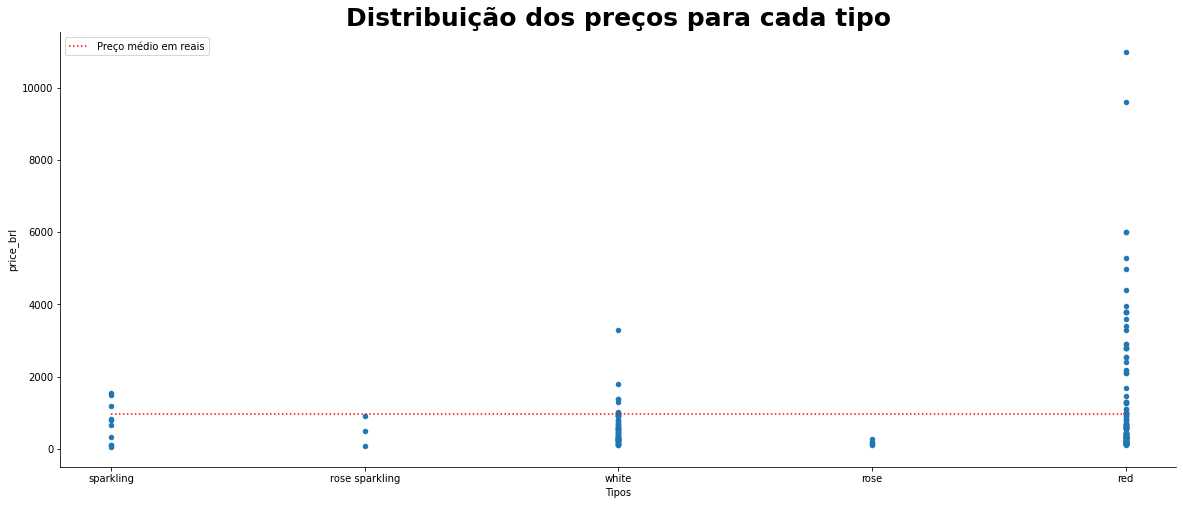

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
ax = df.plot(kind='scatter', x='kind', y='price_brl', ax=ax)
ax.set_xlabel('Tipos')
ax.set_title('Distribuição dos preços para cada tipo', fontdict={'fontsize':25, 'weight':'bold'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# linha indicando o preço médio em reais
linha = ax.hlines(df.price_brl.mean(), 'sparkling', 'red', linestyles='dotted', colors='red')
ax.legend(handles = [linha], labels=['Preço médio em reais'], loc='upper left')
plt.show()

Aqui é possível observar que os vinhos possuem a mesma faixa de preço, sendo que os vinhos mais caros são os tintos.

In [14]:
df.describe()

,item_id,price_brl,price_usd
count,219.000000,219.000000,219.000000
mean,110.000000,967.617352,167.407808
std,63.364028,1409.588217,243.873780
min,1.000000,52.800000,9.130000
25%,55.500000,264.300000,45.725000
50%,110.000000,509.400000,88.130000
75%,164.500000,949.200000,164.220000
max,219.000000,10992.000000,1901.730000


Aqui, é possível perceber que o vinho mais caro disponível no catálogo custa R$10.992,00

Agora que já exploramos o catálogo da loja, é hora de observarmos o dataset das vendas baseado nas datas, ou sej,a nossa série temporal.

In [15]:
df_tempo = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv')
df_tempo.head()

,date,store,item,sales
0,2018-01-01,1,1,13
1,2018-01-02,1,1,11
2,2018-01-03,1,1,14
3,2018-01-04,1,1,13
4,2018-01-05,1,1,10


Aqui, é possível perceber que o dataset das vendas é ainda mais simples, contendo as seguintes colunas:
* date - data das vendas
* store - qual loja da rede ocorreu a venda
* item - qual item foi vendido
* sales - número de vendas


In [16]:
df_tempo.nunique()

date     2192
store       3
item      219
sales     185
dtype: int64

Agora que já conhecemos o dataset das vendas, podemos começar a prepará-lo para utilizá-lo junto com o Prophet do Facebook. A primeira coisa a ser feita, é garantir que as colunas estejam da forma que o Prophet especifica: uma coluna ds, contendo as datas e uma coluna y, contendo as vendas.

In [17]:
df_ts = df_tempo.copy()
df_ts['date'] = pd.to_datetime(df_ts['date'])
df_ts = df_ts.groupby('date', as_index=False)['sales'].sum()
df_ts.head()

,date,sales
0,2016-01-01,6581
1,2018-01-01,43432
2,2018-01-02,43181
3,2018-01-03,43298
4,2018-01-04,42216


In [18]:
# remover a primeira entrada que consta data de 2016
df_ts = df_ts.iloc[1:-1]
# alterar o nome das colunas
df_ts.columns=['ds', 'y']
df_ts.head()

,ds,y
1,2018-01-01,43432
2,2018-01-02,43181
3,2018-01-03,43298
4,2018-01-04,42216
5,2018-01-05,42001


## Utilizando o Prophet
Primeiramente, verificaremos se estamos lidando com uma série estácionária, para isso, utilizaremos o teste estatístico chamado de o teste ***Augmented Dickey Fuller (ADF)***.

### Sobre o ADF
Como foi dito anteriormente, trata-se de um teste estatístico para verificar se a série é ou não estacionária. A hipótese nula do teste é que a série é não estacionária e, no começo do experimento, define-se um valor de confiança para o p-value, isto é: um p-value abaixo do valor definido indica que a hipótese nula é falsa.

Para mais detalhes sobre o ADF, acesse: 
* https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
* https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/

## ADF na série
No nosso teste, definiremos o valor de confiança do p-value como 0.05(5%).

In [19]:
from statsmodels.tsa.stattools import adfuller
teste = df_ts.y
teste.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1    43432
2    43181
3    43298
4    42216
5    42001
Name: y, dtype: int64

Os códigos a seguir foram fornecidos pela equipe Sigmoidal.

In [20]:
# aplicando o ADF
result = adfuller(teste)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value));

Augmented Dickey–Fuller
Statistical Test: -2.3574
P Value: 0.1541364962
Critical Values:
	1%: -3.4365
	5%: -2.8642
	10%: -2.5682


Aqui, podemos observar que o p-value foi de 15%, isso é, há 15% de chance da nossa série ser não-estacionária. Apesar de ser relativamente baixo, o valor ainda é maior do que o valor que foi definido inicialmente, portanto, aplicaremos algumas transformações para que nossa série seja estacionária. Pelo plot abaixo, é possível também ver o aspecto da série, e a grande discrepância entre os valores.

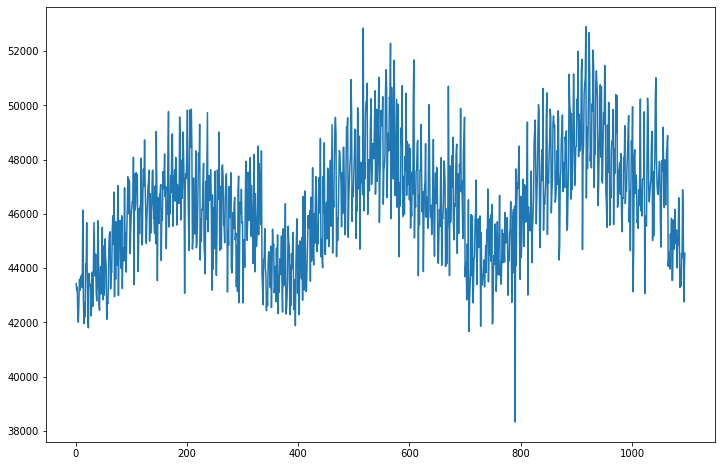

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
df_ts.y.plot(ax=ax)
plt.show();

Uma boa forma de remover a sazonalidade e a diferença na média consiste em dois passos:
* Aplicar o log na série 
* Subtrair a média móvel do período do log da série.

In [22]:
df_ts.y = np.log(df_ts.y)
df_ts.head()

,ds,y
1,2018-01-01,10.678952
2,2018-01-02,10.673156
3,2018-01-03,10.675862
4,2018-01-04,10.650555
5,2018-01-05,10.645449


In [23]:
# subtraindo a média movel dos dados
rolling = df_ts.y.rolling(24).mean() # média móvel de 24 dias
rolling = rolling.dropna() # os primeiros 24 dias possuem média móvel = NaN
df_ts.y = df_ts.y - rolling
df_ts = df_ts.dropna()
df_ts.head()

,ds,y
24,2018-01-24,0.012147
25,2018-01-25,0.005138
26,2018-01-26,0.001386
27,2018-01-27,0.002289
28,2018-01-28,-0.024823


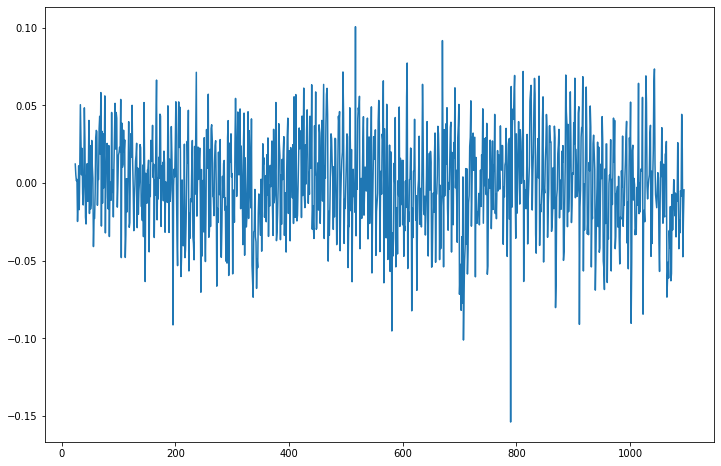

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
df_ts.y.plot(ax=ax)
plt.show();

É possível notar que a série já possui um aspecto diferente do inicial, com menor variação entre os dados. Mas, realizaremos o ADF novamente.

In [25]:
teste = df_ts.y
# aplicando o ADF
result = adfuller(teste)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value));

Augmented Dickey–Fuller
Statistical Test: -5.6305
P Value: 0.0000010924
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682


Aqui, foi possível que o tratamento foi bem sucedido, e que agora a chance da série ser não estacionária é insignificante e podemos começar o experimento.

In [26]:
# importando o Prophet
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

Dado o contexto do problema, faremos o treino do modelo com os 60 primeiros dias de venda. 

In [27]:
m = Prophet()
m.fit(df_ts[:-60])
future = m.make_future_dataframe(periods=60)

forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-24,0.000189,-0.034238,0.032217,0.000189,0.000189,-0.003235,-0.003235,-0.003235,-0.003522,-0.003522,-0.003522,0.000287,0.000287,0.000287,0.0,0.0,0.0,-0.003046
1,2018-01-25,0.000190,-0.026555,0.039183,0.000190,0.000190,0.006391,0.006391,0.006391,0.005717,0.005717,0.005717,0.000674,0.000674,0.000674,0.0,0.0,0.0,0.006581
2,2018-01-26,0.000191,-0.016178,0.053883,0.000191,0.000191,0.019253,0.019253,0.019253,0.018196,0.018196,0.018196,0.001056,0.001056,0.001056,0.0,0.0,0.0,0.019443
3,2018-01-27,0.000192,-0.004399,0.061176,0.000192,0.000192,0.029029,0.029029,0.029029,0.027605,0.027605,0.027605,0.001425,0.001425,0.001425,0.0,0.0,0.0,0.029221
4,2018-01-28,0.000192,-0.047403,0.015647,0.000192,0.000192,-0.016891,-0.016891,-0.016891,-0.018665,-0.018665,-0.018665,0.001774,0.001774,0.001774,0.0,0.0,0.0,-0.016699


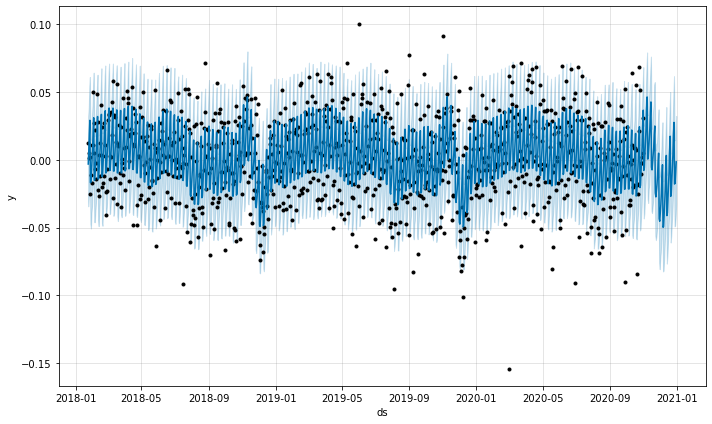

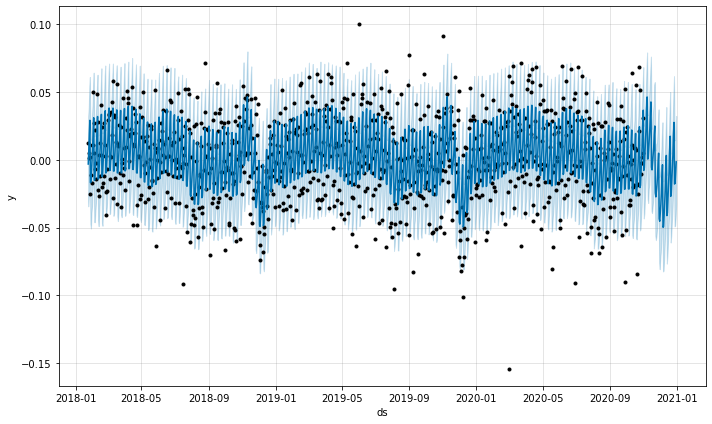

In [28]:
m.plot(forecast)

Para entendermos melhor a nossa previsão, vamos analisar os dados na escala original do problema, utilizandoa função exp:

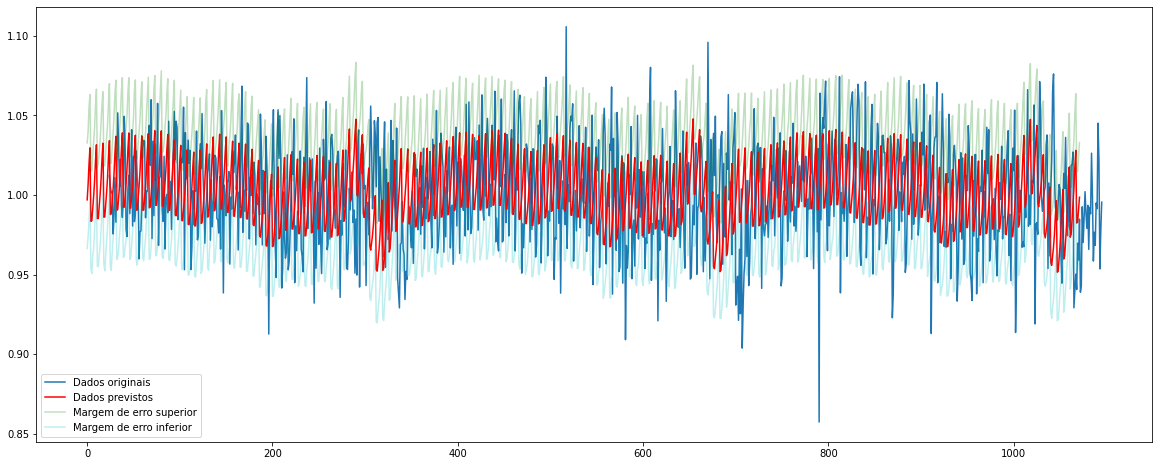

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))
original = np.exp(df_ts.y).plot(ax=ax, label ='Dados originais')
previsao = np.exp(forecast.yhat).plot(ax=ax, color='r', label='Dados previstos')
previsao_up = np.exp(forecast['yhat_upper']).plot(ax=ax, color='g', alpha=0.25, label='Margem de erro superior')
previsao_low = np.exp(forecast['yhat_lower']).plot(ax=ax, color='c', alpha=0.25, label = 'Margem de erro inferior')
ax.legend();

Com esse gráfico, é possível ver que nosso modelo obteve uma boa cobertura do dataset original, e que as previsões foram satisfatórias. Abaixo, veremos uma análise matemática.

In [30]:
df_ts.insert(0, 'yhat', forecast.yhat)
df_ts.reset_index(inplace=True)
df_ts.head(100)

,index,yhat,ds,y
0,24,0.033621,2018-01-24,0.012147
1,25,-0.012313,2018-01-25,0.005138
2,26,-0.011847,2018-01-26,0.001386
3,27,-0.003686,2018-01-27,0.002289
4,28,0.003957,2018-01-28,-0.024823
...,...,...,...,...
95,119,-0.004208,2018-04-29,-0.028592
96,120,0.005262,2018-04-30,-0.025557
97,121,0.018035,2018-05-01,0.017038
98,122,0.027797,2018-05-02,0.031688


In [34]:
squared_error = (df_ts.yhat - df_ts.y)**2
squared_error.mean()

0.0017103994278348821

Aqui podemos ver que nosso Mean Squared Error (MSE) foi muito baixo, o que é extremamente satisfatório, indicando que o modelo de previsão é eficiente.

## Conclusão e aprendizados
Nesse projeto, pudemos notar mais uma vez a importância do *business understanding*, tanto para entender as técnicas que devem ser empregadas, tanto para fazer uma análise exploratória que traz conclusões relevantes. Outro detalhe também, é o rigor estatístico que permeia as séries temporais, que exigem o uso de ferramentas específicas para que o modelo atinja resultados satisfatórios.